#  Homework 3 (HW3)

Deadline: April 3rd Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW3/1)

In this exercise we  predict the quality of different wines! Can a winemaker predict whether his wine will be considered a good quality wine by the jury based on it's chemical properties only? 🍷 (50%)

**a)** We will work using the data available at the [UCI dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). It  contains data on 11 chemical properties (e.g. sugar content, pH, alcohol content, etc.) of thousands of north-Portugalian wines. Each wine has a quality-score on a scale of 10. 

* Import the **Red** wine data into a pandas dataframe from the [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (You can import the data directly from the web page, without dowloading it to your computer!) The *quality* column will be the target variable, the rest will be the features. 
* This will be a binary classification problem, hence, redefine the target variable in the following way: let it be 0 if the *quality < 7* (bad wines) and let it be 1 if *quality $\geq$ 7* (good wines). Create separate *numpy arrays* to store the target and the rest of the attributes!  


In [45]:
import pandas as pd
import urllib.request
import requests
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

wines = pd.read_csv(url, delimiter = ";")
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
wines['wine_quality'] = np.where(wines['quality'] < 7, 0, 1)
wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [47]:
wines = wines.drop('quality', axis=1)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**b)** Classification, cross validation
* Perform a classification using the kNN algorithm! Using the 10-fold cross validation technique determine for what *k* value will the classifier's F-score be optimal! (Analyze values of *k* in a reasonable interval!) <br>
Present the boxplot of the obtained F-scores (the boxplot of 10 F-scores for each *k* values) against *k*!  <br>
(Hint: use the *model_selection.cross_val_score* function and set *scoring = 'f1'*!) 
<br>
(Hint2: use the boxplot function from the *seaborn* package!)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

attributes = wines.iloc[:, :-1].astype(float)
target = wines.iloc[:, -1].astype(float)

k_values = range(1, 21)

f_scores = []

for k in k_values:
    # Create the kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 10-fold cross validation and calculate the F-score
    f_score = cross_val_score(knn, attributes, target, cv=10, scoring='f1')
    
    # Append the F-score to the list of F-scores
    f_scores.append(f_score)
    
optimal_k_value = k_values[np.argmax(f_scores)]

print("Optimal k value: ", optimal_k)

Optimal k value:  1


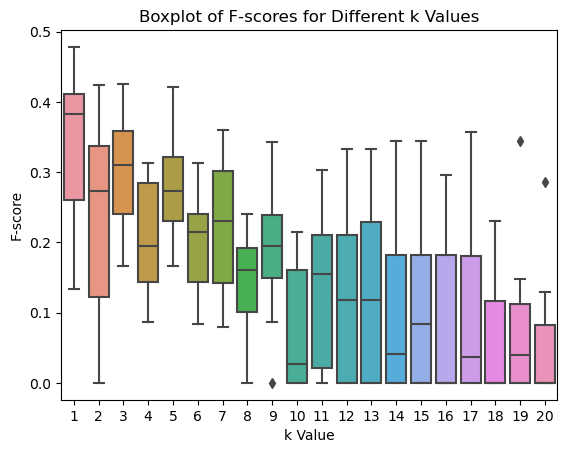

In [49]:
# Convert the list of F-scores to a DataFrame
df = pd.DataFrame(f_scores, index=k_values)

# Transpose the DataFrame to get k values as columns
df = df.T

# Create the boxplot using seaborn
sns.boxplot(data=df)

# Set the plot title and axis labels
plt.title('Boxplot of F-scores for Different k Values')
plt.xlabel('k Value')
plt.ylabel('F-score')

# Show the plot
plt.show()

**c)** Now solve the classification problem using a decision tree! Repeat the analysis of part b), but now, let the examined parameter be the tree's maximum depth!

In [50]:
from sklearn.tree import DecisionTreeClassifier

max_depths = range(1,11)

f1_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, attributes, target, cv=10, scoring='f1')
    f1_scores.append(scores.mean())
    
optimal_depth = max_depths[f1_scores.index(max(f1_scores))]
print("Optimal Depth: ", optimal_depth)

Optimal Depth:  4


---

## Exercise 2 (HW3/2)

Using predictive analytics methods, we would like to identify first-year college students at risk of dropping out and academic failure. <span style="color:red">Write a one-page long essay covering the following points!</span> (50%) If you would prefer, you can write an essay about a data science research question of your choice.

**a)** Design the analysis, think through the stages of the analysis following CRISP-DM methodology! How can you state the problem as a data science problem? What machine learning approaches could be used here? (See Lecture 02!) 

**b)** Do you think that the requirements of a successful data science projects are met? Go through the 7 requirements that we have covered in class! (See Lecture 02!) 

**c)** What ethical questions are raised in this project? Mention utilizations that you think are useful and ethical and give examples of bad applications as well!


In [ ]:
"""
Identifying first-year college students at risk of dropping out and academic failure is an important problem that requires 
a data-driven approach to identify the key factors that contribute to students' academic success or failure. In order to 
address this problem, we can follow the CRISP-DM methodology, which is a widely-used process for data mining and analytics.

The first step (Business understanding) in the analysis would be to define the problem and determine the goals of the 
analysis. In this case, the goal is to identify students who are at risk of dropping out and academic failure in their 
first year of college. The problem can be stated as a classification problem, where we need to classify students into two 
classes - at-risk and not at-risk - based on their academic performance and other relevant factors.

The next step (Data understanding) would be to collect and explore the data. We would need to gather data on students' 
academic performance, such as grades, attendance, and course completion rates, as well as demographic and socioeconomic 
factors that could impact their academic success, such as gender, race, income, and family background. We could also collect 
data on students' engagement with the college, such as participation in extracurricular activities and interactions with 
advisors and other support services.

Once we have collected the data, we can begin to preprocess and clean it, identifying and handling missing values, outliers,
and other data quality issues. We can then perform exploratory data analysis (EDA) to identify patterns and relationships 
in the data that could be useful for predicting at-risk students.

After EDA, we can begin to develop machine learning models to predict which students are at risk of dropping out or 
academic failure. There are several machine learning approaches that could be used here, such as decision trees. These 
models would be trained on a subset of the data and evaluated on a test set to assess their performance.

To determine the best model for predicting at-risk students, we can use performance metrics such as accuracy, precision, 
recall, and F1-score, and compare the performance of different models. We can also perform feature selection to identify 
the most important factors that contribute to students' academic success or failure.

Finally, we can deploy the model to predict at-risk students in real-time and use these predictions to provide targeted 
support and interventions to help students succeed academically. By following the CRISP-DM methodology, we can ensure that 
the analysis is rigorous, and that the results are actionable and useful for improving students' academic outcomes.

The project of identifying first-year college students at risk of dropping out and academic failure raises important 
ethical questions related to privacy, fairness, and potential harm to the students involved.

One ethical concern is the collection and use of personal data of the students, which should be done with their informed 
consent and in accordance with privacy regulations. It is crucial to ensure that the data is used solely for the purpose 
of improving their academic performance and not for any other purpose, such as discrimination based on gender, race, or 
socioeconomic status. Another ethical issue is the potential for the algorithm to reinforce and create biases that exist 
in the data. For example, if the dataset used to train the algorithm has biased information, such as socioeconomic status, 
the algorithm may assign a higher risk score to students who come from lower-income backgrounds, regardless of their actual 
academic performance.

It is important to use the results of the analysis in a way that supports students' success, providing them with the 
resources they need to overcome challenges and improve academically. For example, a good application of the analysis would 
be to identify students who need extra support and provide them with targeted interventions, such as tutoring or mentoring 
programs.

On the other hand, a bad application of the analysis would be to use the results to punish or restrict students, for 
example, by denying them admission to certain programs or scholarships based on their risk score. This could harm their 
academic and professional development, and increase inequality.

"""